In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

%matplotlib ipympl

In [2]:
def compute_distance(xs,ys,xr,yr):
    return np.sqrt((xs-xr)**2+(ys-yr)**2)    

def generate_delayed_pulse(plen,pwidth,d,c,t): #la distance et la vitesse du pulese conditionne le dt qui devra être appliqué 
    '''Fonction permettant de créer un tableau contenant les divers pulses delayed des différents receivers pour une source donnée'''
    wavelet = sp.ricker(plen,pwidth)
    
    tpulse = d/c #calcule les différents temps d'arrivée du pulse au lvl des différents receivers
    tpulse = np.round(tpulse, decimals=2) #grace au round on est sûr qu'il arrive à trouver un indice pour le tpsule dans t
    
    dt = t[1]-t[0]
    
    #on sait à quel temps on doit avoir le pulse, donc à quel temps doit faire la convolution
    
    dirac = np.zeros((len(tpulse),len(t))) # nombre de receivers en ligne et durée du signal en colonnes
    trace = np.zeros((len(tpulse),len(t)))
    
    #on boucle sur l'ensemble des stations et pour chaque station on met le pulse au temps associé
    for i in range(len(tpulse)):
        #dirac[i,np.where(t==tpulse[i])] = 1 #pour une certaine raison ça ne focntionne pas tout le temps...  
        dirac[i,int((1/dt)*tpulse[i])] = 1
        trace[i,:] = np.convolve(dirac[i,:],wavelet,mode='same')
    return trace

def compute_crosscorr(trace):
    return np.correlate(trace[0,:],trace[1,:], mode='full')
    
def generate_sources(xmin,xmax,ymin,ymax,number):
    xs = np.random.randint(low=xmin,high=xmax,size=number)
    ys = np.random.randint(low=ymin,high=ymax,size=number)
    return xs,ys

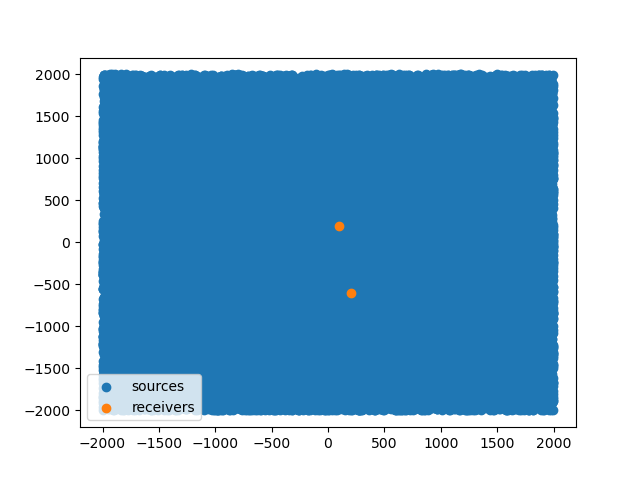

In [3]:
xs,ys = generate_sources(-2000,2000,-2000,2000,50000)
xr = np.array([100,200])
yr = np.array([200,-600])

plt.figure()
plt.scatter(xs,ys, label='sources')
plt.scatter(xr,yr,label='receivers')
plt.legend()

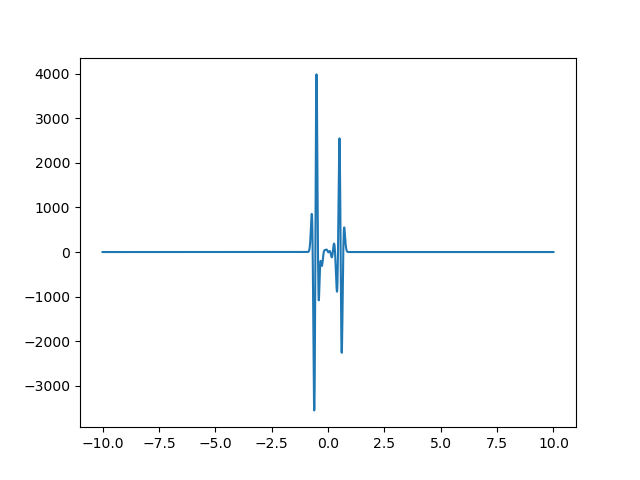

In [4]:
#on va simplement faire une boucle sur les sources et sommer dans la boucle le résultat de chacune des cross corrélations, on s'embête pas

c = 1500  #une seule famille d'onde for now

t = np.arange(0,10,0.01) 

corr = np.zeros(2*len(t)-1)
lag = np.linspace(-10,10,len(corr))

for i in range (len(xs)):
    d = compute_distance(xs[i],ys[i],xr,yr)
    trace = generate_delayed_pulse(50,5,d,c,t)
    corr += compute_crosscorr(trace)
    
plt.figure()
plt.plot(lag,corr) #on retrouve la réponse impulsionnelle convoluée avec la source, donc la fonction de Green 

Text(0.5, 0, 'lag')

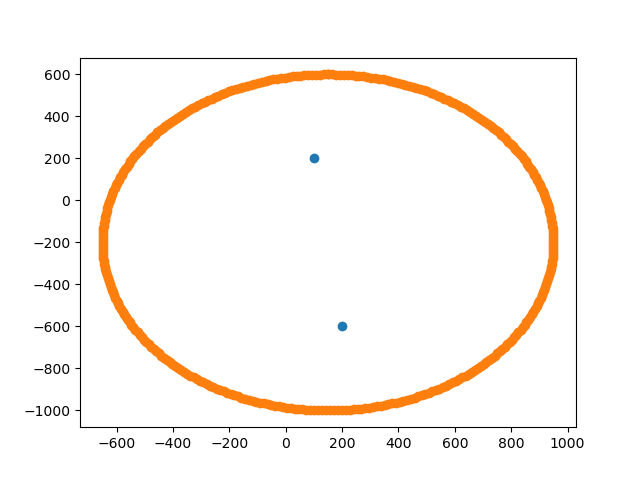

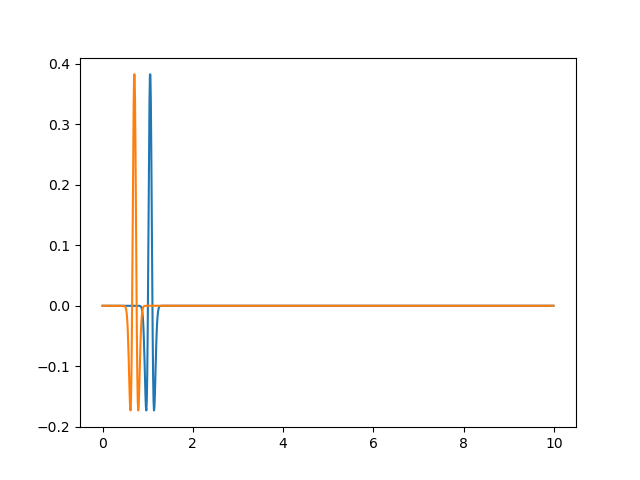

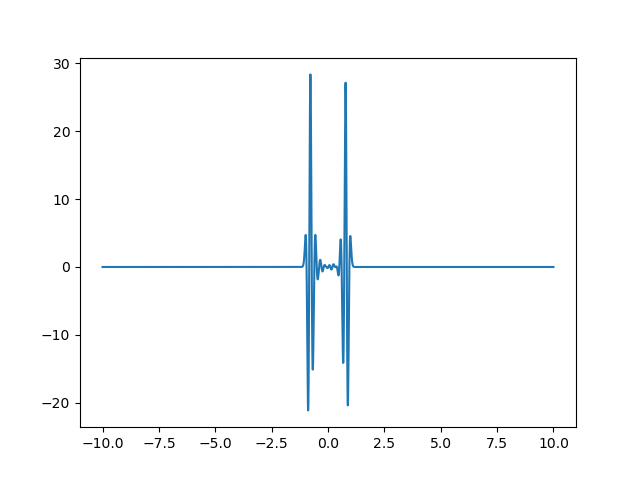

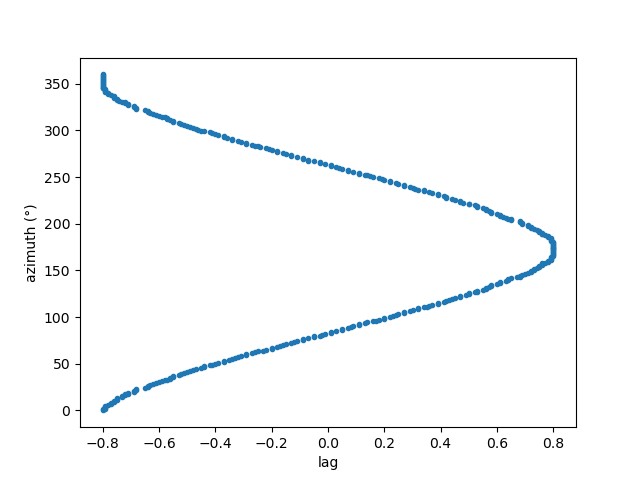

In [5]:
#on essaye de mettre des sources tout autour 

c = 1000

x0 = np.mean(xr)
y0 = np.mean(yr)   #on met les sources sur un cercle centré sur le barycentre des deux récepteurs

rayon = 800
angles = np.linspace(0,2*np.pi,360) 

xs_cercle = x0+rayon*np.sin(angles)
ys_cercle = y0+rayon*np.cos(angles)

#plots pour vérifier la position des sources par rapport aux stations
plt.figure()
plt.scatter(xr,yr)
plt.scatter(xs_cercle,ys_cercle)

lag = np.linspace(-10,10,len(corr))
lag_list = []

corrsum = np.zeros(2*len(t)-1)

for i in range (len(xs_cercle)):
    d = compute_distance(xs_cercle[i],ys_cercle[i],xr,yr)
    trace = generate_delayed_pulse(50,5,d,c,t)
    if i ==111:
        plt.figure()
        plt.plot(t,trace[0,:])
        plt.plot(t,trace[1,:])
    corr = compute_crosscorr(trace)
    corrsum += corr
    lag_list.append(lag[np.where(corr==max(corr))][0]) 
    
    
    
#plot   angle en focntion du lag doit voir espèce de sinusoïde    

#plot du résultat de la corrélation
plt.figure()
plt.plot(lag,corrsum) #le résultat avec sources evenly distributed est encore plus parfait qu'avec pos aléatoires

plt.figure()
plt.plot(lag_list,np.rad2deg(angles), linewidth=0, marker='.')
plt.ylabel('azimuth (°)')
plt.xlabel('lag')

#là ça a le comportement attendu, on retrouve bien la forme de sinusoide attendue  quand on représente le   dt en focntion de l'angle
#y'a un min de la sinu pour la partie négative de la fonction de green et un max de la sinu pour la partie positiv ede la fonction de green  -> le lag du min et du max de la sinusoide donne le 
#le même lag que ce qui est obtenu par la fonction de green trouvée en sommant les corrélations calculées pour toutes les sources autour de la paire de station

#si notre signal est perçu comme la convolution entre source et réponse impulsionelle, alors il est comme la transformée de fourier de cette sinusoïde / vice versa 





